## Homework 2
### Student Group 18 - Timothy Lai, McKenna Karnes, Korawat Tanwisuth

### NYC Restaurants

In [1]:
from pandas import Series, DataFrame
import pandas as pd

df = pd.read_csv('NYC_Restaurants.csv', dtype=unicode)

### [Q1] Creating a unique name for each restaurant
- Add a column name 'RESTAURANT' then combine strings for DBA, BUILDING, STREET, ZIPCODE
- Print the first 10 values

In [2]:
df['RESTAURANT'] = df['DBA'] + " " + df['BUILDING'] + " " + df['STREET'] + " " + df['ZIPCODE']
df['RESTAURANT'][:10]

0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

### [Q2] How many restaurants are included in the data?
- Drop duplicates (i.e. rows of same restaurant with multiple violations)
- Use len() function to determine how many total restaurants

In [3]:
restaurants_df = df.drop_duplicates(subset=['RESTAURANT'])
print "Number of Restaurants = ", len(restaurants_df)

Number of Restaurants =  10114


### [Q3] How many chains are there?

- Use "value_counts" to determine number of unique restaurants
- Use mask to filter for no. of restaurants that appear two or more times

In [4]:
num_rest = restaurants_df['DBA'].value_counts()
num_chains = num_rest[num_rest >= 2]
print "Number of Chains = ", len(num_chains)

Number of Chains =  368


### [Q4] Plot a bar graph of the top 20 most popular chains.
- Add %pylab inline to call "plot" function
- Use plot function to plot bar graph

Populating the interactive namespace from numpy and matplotlib


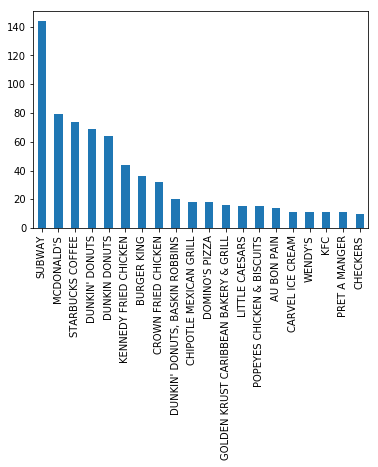

In [5]:
%pylab inline

top_20_chains = num_chains[:20]
top_20_chains.plot(kind='bar')

### [Q5] What fraction of all restaurants are chains?
- Divide the total number of chains by total number of restaurants. Use "float" to ensure we get a fraction.

In [6]:
non_chains = num_rest[num_rest < 2]
chains = len(restaurants_df)-len(non_chains)
frac_chains = float(chains)/len(restaurants_df)
print "The fraction of all restaurants that are chains is:", frac_chains

The fraction of all restaurants that are chains is: 0.164722167293


### [Q6] Plot the number of non-chain restaurants in each boro.

- Create list of only names of non-chain restaurants
- Cross reference original unique restaurant df for non-chain restaurants
- Drop "Missing" boro's from value_counts()

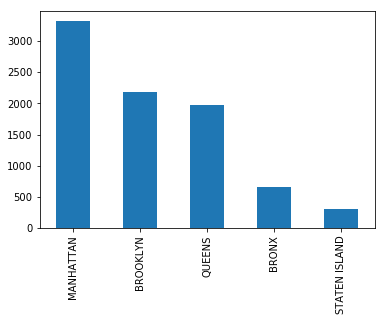

In [7]:
non_chains = num_rest[num_rest < 2]
non_chain_names = non_chains.index.values
rest_boro = restaurants_df[restaurants_df['DBA'].isin(non_chain_names)]
rest_boro['BORO'].value_counts().drop("Missing").plot(kind='bar')




### [Q7] Plot the fraction of non-chain restaurants in each boro.

- Set variables for total non-chain restaurants in each boro and total restaurants in each boro.
- Plot variables against each other.

We see that the boro with the most independent restaurants (Manhattan) is NOT the boro with the highest ratio of independent restaurants (Brooklyn).

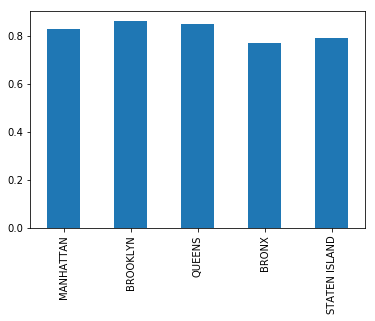

In [8]:
total_nonchain_per_boro = rest_boro['BORO'].value_counts().drop("Missing")
total_rest_per_boro = restaurants_df['BORO'].value_counts().drop("Missing")
(total_nonchain_per_boro/total_rest_per_boro).plot("bar")

### [Q8] Plot the popularity of cuisines.

- Get subset of data frame for Restaurant, Cuisine Description.
- Identify top 20 cuisines with value_counts(), then plot.

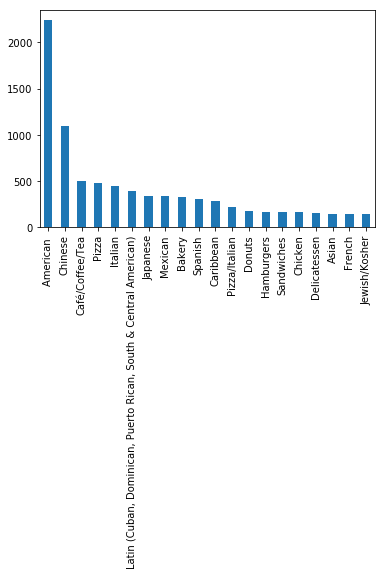

In [9]:
cuisines_df = df.drop_duplicates(subset=['RESTAURANT', 'CUISINE DESCRIPTION'])
top_20_cuisines = cuisines_df['CUISINE DESCRIPTION'].value_counts()[:20]
top_20_cuisines.plot(kind='bar')

### [Q9] Plot the cuisines among restaurants which never got cited for violations.

- Identify "clean" restaurants by searching for nulls in "VIOLATION CODE" column.
- Cross reference those restaurants to make sure they didn't have past violations. Create another mask for "unique" clean restaurants.
- Identify top 20 "unique clean" cuisines with value_counts(), then plot.

American                                                            49
Chinese                                                             42
Café/Coffee/Tea                                                     14
Pizza                                                               11
Italian                                                             10
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    10
Spanish                                                              8
Japanese                                                             8
Bakery                                                               7
Other                                                                6
Asian                                                                6
Donuts                                                               5
Delicatessen                                                         5
French                                                               4
Thai  

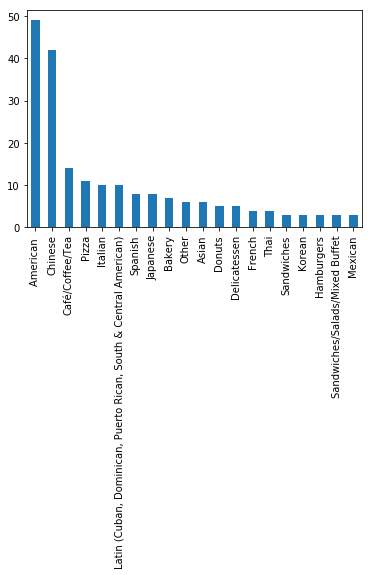

In [10]:
rest_by_cuisine = df[['CUISINE DESCRIPTION', 'VIOLATION CODE', 'RESTAURANT']].drop_duplicates()

clean_rest_mask = rest_by_cuisine['VIOLATION CODE'].isnull()
clean_rest = rest_by_cuisine[clean_rest_mask]

dirty_rest_mask = rest_by_cuisine['VIOLATION CODE'].notnull()
dirty_rest = rest_by_cuisine[dirty_rest_mask]

non_unique_clean = clean_rest['RESTAURANT'].isin(dirty_rest['RESTAURANT'])
unique_clean_df = clean_rest[~non_unique_clean]

top_20_clean_cuisines = unique_clean_df['CUISINE DESCRIPTION'].value_counts()[:20]
print top_20_clean_cuisines
top_20_clean_cuisines.plot(kind="bar")

### [Q10] What cuisines tend to be the "cleanest"?

- Filter for cuisines that have at least 20 restaurants.
- Identify top 20 "unique clean" cuisines with value_counts(), then list ratios in descending order.

In [11]:
total_cuisines = cuisines_df['CUISINE DESCRIPTION'].value_counts()
atleast_twenty_cuisines = total_cuisines[total_cuisines >= 20]
atleast_twenty_cuisines_types = atleast_twenty_cuisines.index.values

clean_twenty_cuisines_types = unique_clean_df[unique_clean_df['CUISINE DESCRIPTION'].isin(atleast_twenty_cuisines_types)]
clean_twenty_cuisines_count = clean_twenty_cuisines_types['CUISINE DESCRIPTION'].value_counts()

clean_ratio = clean_twenty_cuisines_count/total_cuisines
clean_ratio.sort_values(ascending = False)[:10]


Soul Food                        0.090909
Vietnamese/Cambodian/Malaysia    0.062500
Other                            0.058252
Soups & Sandwiches               0.047619
Continental                      0.047619
Barbecue                         0.047619
Asian                            0.041096
Chinese                          0.038251
Greek                            0.036364
Peruvian                         0.035714
Name: CUISINE DESCRIPTION, dtype: float64

### [Q11] What are the most common violations in each borough?

- Create a mask to identify boro's - delete "Missing" as previously identified
- Per crosstab function description, insert "Violation Description" as Index and "Boro" as Columns.
- Then identify the most common violation description for each boro using idxmax().

In [12]:
boro_df_mask = df['BORO'] != "Missing"

cross_tab = pd.crosstab(df['VIOLATION DESCRIPTION'][boro_df_mask], df['BORO'][boro_df_mask])
cross_tab

BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
VIOLATION DESCRIPTION,,,,,
"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",12,40,49,29,5
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,1,5,6,4,1
''''Wash hands sign not posted at hand wash facility.,21,57,93,60,8
"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",5,12,19,24,3
Accurate thermometer not provided in refrigerated or hot holding equipment.,21,76,98,92,16
"Appropriately scaled metal stem-type thermometer or thermocouple not provided or used to evaluate temperatures of potentially hazardous foods during cooking, cooling, reheating and holding.",27,120,162,85,17
Ashtray present in smoke-free area.,4,4,5,8,1
"Bulb not shielded or shatterproof, in areas where there is extreme heat, temperature changes, or where accidental contact may occur.",20,93,168,80,10
"Caloric content not posted on menus, menu boards or food tags, in a food service establishment that is 1 of 15 or more outlets operating the same type of business nationally under common ownership or control, or as a franchise or doing business under the same name, for each menu item that is served in portions, the size and content of which are standardized.",0,4,6,5,1


In [13]:
cross_tab.idxmax()

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

### [Q12] What are the most common violations per borough, after normalizing for the relative abundance of each violation?

- Create a variable "violationFrequency" to count how common each violation is - sorted by index.
- Transpose cross_tab to match indices, then normalize counts.
- Use idxmax() to identify most common violation descriptions for each boro.

In [18]:
violationFrequency = df['VIOLATION DESCRIPTION'][boro_df_mask].value_counts().sort_index()
cross_tab_tp = cross_tab.T.sort_index()
cros
#norm_violations = cross_tab_tp/violationFrequency
#norm_violations.T.idxmax()

Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.                                                                                                                                      135
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted                                                                                                                                                                                                                                                   17
''''Wash hands sign not posted at hand wash facility.                                                                                                                                                                                                                

### [Q13] How many phone area codes correspond to a single zipcode?

- Mask for the first three digits of phone number (area code) by splitting the string.
- Check value counts for zip codes/area codes that only appear once.

In [15]:
df['AREA CODE'] = df['PHONE'].str[:3]
df_zip_area = df[['ZIPCODE', 'AREA CODE']].drop_duplicates()
print "The number of phone area codes that correspond to a single zipcode is:", sum(df_zip_area['AREA CODE'].value_counts() == 1)


The number of phone area codes that correspond to a single zipcode is: 34


### [Q14] Find common misspellings of common street names
- Create a new data frame column called "STREET TYPE", which includes the last word in the name of the streets.
- Create a new data frame column called "STREET BASE", which includes everything but the last word in the name of the street.
- Create a new data frame column called "STREET BASE & ZIP", which combines the street base and zipcode.
- Extract these columns of the data frame, and drop duplicates and empties for street name - this gives us unique street names only.
- Merge this new data frame table with itself - that way we can see which rows have different street types.
- Create a cross-tab with the two distinct street types (x and y by default).
- Find the most common street types via idxmax() and the number of times they are in the data frame by max().

In [16]:
df['STREET TYPE'] = df['STREET'].str.split().str[-1]
df['STREET BASE'] = df['STREET'].str.split().str[:-1].apply(lambda l: " ".join(l))
df['STREET BASE & ZIP'] = df['STREET BASE'] + " " + df['ZIPCODE']

new_df = df[['STREET TYPE', 'STREET BASE', 'STREET BASE & ZIP']].drop_duplicates()
drop_empties = new_df != ""
new_df_clean = new_df[drop_empties]

new_df_merged = new_df_clean.merge(new_df_clean, left_on = 'STREET BASE & ZIP', right_on = 'STREET BASE & ZIP')
mask_diff = new_df_merged['STREET TYPE_x'] != new_df_merged['STREET TYPE_y']
new_df_diff = new_df_merged[mask_diff]

st_cross_tab = pd.crosstab(new_df_diff['STREET TYPE_x'], new_df_diff['STREET TYPE_y'])

common_st = pd.DataFrame({'Most Common Street Types ': st_cross_tab.idxmax(), 'Number of Times ': st_cross_tab.max()})
st_names = ['AVE', 'ST', 'RD', 'PL', 'BOULEARD', 'BULEVARD']

misspelled = common_st[common_st.index.isin(st_names)]
print "The most common street types and the number of times they are misspelled are shown in the data frame below."
misspelled

The most common street types and the number of times they are misspelled are shown in the data frame below.


,Most Common Street Types,Number of Times
STREET TYPE_y,,
AVE,AVENUE,163
BOULEARD,BLVD,1
BULEVARD,BLVD,1
PL,PLACE,3
RD,ROAD,16
ST,STREET,94
